In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
arbutusObsRaw = pd.read_csv("ArbutusObsevations.csv", sep = "\t")

/tmp/ipykernel_3513/2947188566.py:1: DtypeWarning: Columns (10,39,46) have mixed types. Specify dtype option on import or set low_memory=False.
  arbutusObsRaw = pd.read_csv("ArbutusObsevations.csv", sep = "\t")


In [3]:
arbutusObs = arbutusObsRaw[['species', 'decimalLatitude', 'decimalLongitude', 'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation']]

In [4]:
arbutusMenziesiiObs = arbutusObs[arbutusObs["species"] == "Arbutus menziesii"]

In [5]:
arbutusMenziesiiObs = arbutusMenziesiiObs[arbutusMenziesiiObs["decimalLatitude"].astype(int) >= 0]
arbutusMenziesiiObs = arbutusMenziesiiObs[arbutusMenziesiiObs["decimalLongitude"].astype(int) <= -10]

In [6]:
strHead = "{ \"type\":\"FeatureCollection\", \"features\":[ {\"type\":\"Feature\", \"properties\":{}, \"geometry\":{ \"coordinates\":["
coords= "[[-121.99100834896898,44.085339271440574],[-122.25426614942899,44.085339271440574],[-122.25426614942899,43.9070028454079],[-121.99100834896898,43.9070028454079],[-119.8100834896898,43.9570028454079],[-121.99100834896898,44.085339271440574]]"
strTail="],\"type\":\"Polygon\"}}]}"

In [11]:
jsonString = strHead + coords + strTail

with open("Output2.geojson", "w") as text_file:
    text_file.write(jsonString)

In [19]:
coordsNew = [[maxLon, maxLat], [maxLon,minLat], [minLon,minLat],[minLon,maxLat],[maxLon,maxLat]]

In [13]:
str(coordsNew)

'[[50.585645, -117.473198], [50.585645, -127.009742], [33.675249, -127.009742], [33.675249, -117.473198], [50.585645, -117.473198]]'

In [20]:
with open("FirstApprox4.geojson", "w") as text_file:
    text_file.write(strHead + str(coordsNew) + strTail)

In [47]:
with open("SecondApprox3.geojson", "w") as text_file:
    text_file.write(strHead + str(points[hull.vertices].tolist()) + strTail)


In [ ]:
points = rng.random((30, 2)) 

In [12]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
rng = np.random.default_rng()
points = np.array(menziePts)  # 30 random points in 2-D
hull = ConvexHull(points)


NameError: name 'menziePts' is not defined

In [46]:
points[hull.vertices].tolist()

[[-117.473198, 33.675249],
 [-122.306104, 49.044096],
 [-122.588862, 49.517249],
 [-122.594518, 49.522626],
 [-125.036018, 50.257195],
 [-125.238743, 50.315119],
 [-126.918113, 50.57703],
 [-127.009742, 50.585645],
 [-124.285147, 40.324895],
 [-123.655713, 38.868994],
 [-121.849843, 36.282733],
 [-120.387121, 34.528197]]

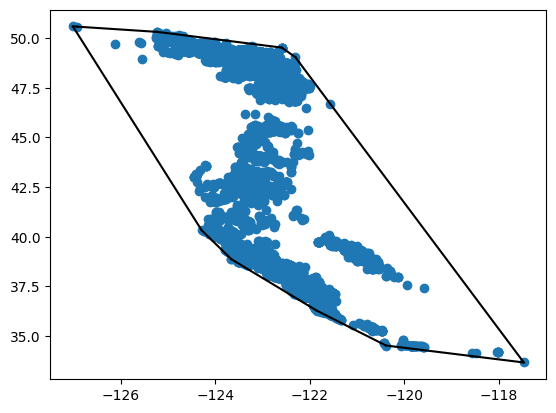

In [32]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

In [18]:
arbutusMenziesiiObs.head(10)

,species,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation
1,Arbutus menziesii,38.415645,-122.598695,10.0,NaN,NaN
2,Arbutus menziesii,38.018904,-122.657393,21.0,NaN,NaN
3,Arbutus menziesii,43.364802,-124.320687,9.0,NaN,NaN
4,Arbutus menziesii,37.998169,-122.709572,4.0,NaN,NaN
5,Arbutus menziesii,48.516700,-123.581855,2.0,NaN,NaN
6,Arbutus menziesii,40.324895,-124.285147,5.0,NaN,NaN
9,Arbutus menziesii,49.207220,-123.968545,159.0,NaN,NaN
11,Arbutus menziesii,47.620823,-122.755036,10.0,NaN,NaN
12,Arbutus menziesii,37.842638,-122.197263,10.0,NaN,NaN
13,Arbutus menziesii,48.319807,-123.544025,244.0,NaN,NaN


In [21]:
arbutusMenziesiiObs["decimalLongitude"].iloc(0)[1]

-122.657393

In [18]:
menziePts = [[arbutusMenziesiiObs["decimalLongitude"].iloc(0)[i],arbutusMenziesiiObs["decimalLatitude"].iloc(0)[i]] for i in range(len(arbutusMenziesiiObs["decimalLongitude"]))]

In [ ]:
#My first idea for computing a better hull: 

In [7]:
def minDist(l1,l2):
    M = 9999
    for pt1 in l1:
       for pt2 in l2:
           M = min(math.dist(pt1,pt2), M)
    return M

In [8]:
def myClustering(points):
    populations = []
    sortedPoints = sorted(points , key=lambda k: [k[1], k[0]])
    minPop = []
    minPop.append(sortedPoints[0])
    populations.append(minPop)
    maxDist = 1.9
    counter = 0
    maxMinDist = 0
    for pt in sortedPoints: 
        counter += 1
        print(counter)
        D = minDist([pt], populations[0])
        for pop in populations:
            D2 = minDist([pt], pop)
            maxMinDist = max(maxMinDist, D2)
            if D2 < D:
                minPop = pop
                D = D2
        if D2 < maxDist:
            minPop.append(pt)
        else: 
            populations.append([pt])
    print(maxMinDist)
        #compute the mininum distance to a population
 #If this minimum distance is bigger than max distance, make a new population. 
    return populations

In [123]:
def postProcessing(populations, maxDist):
    newPopulations = []
    for i in range(len(populations)):
        j = 0
        while j < len(newPopulations):
            if maxDist > minDist(populations[i], newPopulations[j]):
                newPopulations[j] = newPopulations[j] + populations[i]
                break
            j = j + 1
        if j == len(newPopulations):
            newPopulations.append(populations[i])
    return newPopulations


    # for each pop in populations
    #loop through the previous populations
    #If one is too close, combine the two and add it to the list
    #If none is close enough just add the population in question
    #return the new population

In [2]:
strHead = "{ \"type\":\"FeatureCollection\", \"features\":[ {\"type\":\"Feature\", \"properties\":{}, \"geometry\":{ \"coordinates\":["
coords= "[[-121.99100834896898,44.085339271440574],[-122.25426614942899,44.085339271440574],[-122.25426614942899,43.9070028454079],[-121.99100834896898,43.9070028454079],[-119.8100834896898,43.9570028454079],[-121.99100834896898,44.085339271440574]]"
strTail="],\"type\":\"Polygon\"}}]}"

In [4]:
def fileWriter(polygons):
    jsonString = strHead
    jsonString += str(polygons)
    jsonString += strTail
    with open("FourthApprox1.geojson", "w") as text_file:
        text_file.write(jsonString)

In [19]:
populations = myClustering(menziePts)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [20]:
newPopulations = postProcessing(populations)

In [20]:
polygons = ConvexHull(newPopulations[0])

In [24]:
import matplotlib.pyplot as plt

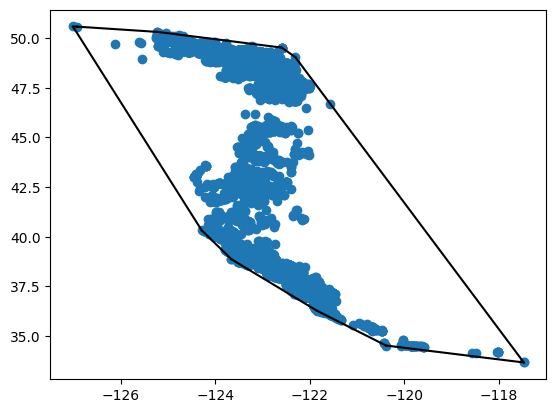

In [28]:
plt.plot(np.array(newPopulations[0])[:,0], np.array(newPopulations[0])[:,1], 'o')
for simplex in polygons.simplices:
    plt.plot(np.array(newPopulations[0])[simplex, 0], np.array(newPopulations[0])[simplex, 1], 'k-')

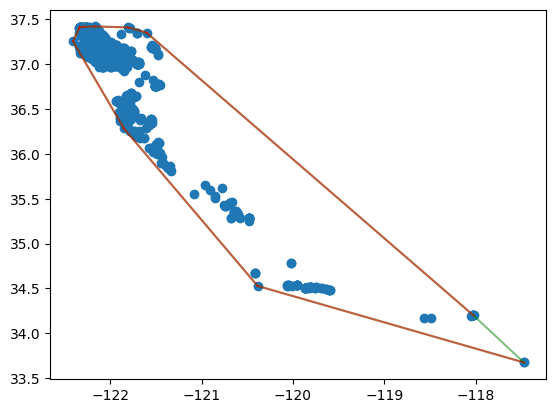

In [40]:
from scipy.spatial import ConvexHull

from concave_hull import concave_hull, concave_hull_indexes


points = np.array(populations[0])
convex_hull = ConvexHull(points[:, :2])  # it's already N-by-2, I'm just emphasizing

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html

plt.plot(points[:, 0], points[:, 1], "o")
for simplex in convex_hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], "g-", alpha=0.5)

idxes = concave_hull_indexes(
    points[:, :2],
    length_threshold=10,
)
# you can get coordinates by `points[idxes]`
assert np.all(points[idxes] == concave_hull(points, length_threshold=10))

for f, t in zip(idxes[:-1], idxes[1:]):  # noqa
    seg = points[[f, t]]
    plt.plot(seg[:, 0], seg[:, 1], "r-", alpha=0.5)
# plt.savefig('hull.png')
plt.show()

In [84]:
len(populations)

3

In [85]:
len(populations[0])

1628

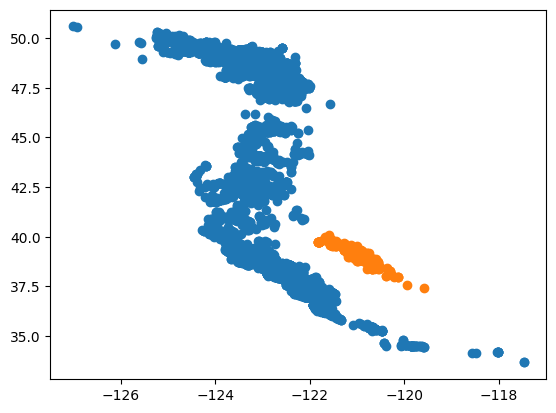

In [93]:
import matplotlib.pyplot as plt
for pop in newPopulations:
        plt.plot(np.array(pop)[:,0], np.array(pop)[:,1], 'o')

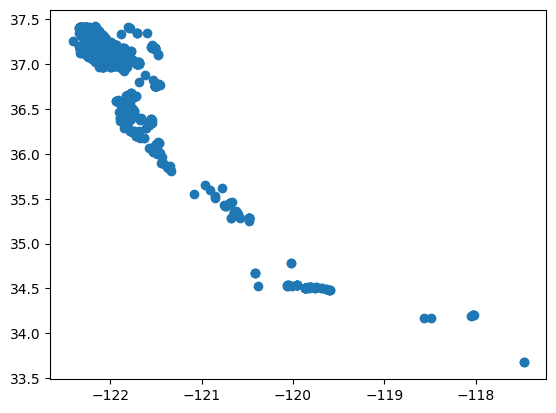

In [73]:
plt.plot(np.array(populations[0])[:,0], np.array(populations[0])[:,1], 'o')

In [14]:
import shapely

In [12]:
from shapely import MultiPoint, Polygon

In [22]:
poly0 = shapely.concave_hull(MultiPoint(newPopulations[0]), ratio=0.1)
poly1 = shapely.concave_hull(MultiPoint(newPopulations[1]), ratio=0.1)

In [38]:
from shapely.geometry import mapping, Polygon
import fiona
import os
import shutil 

In [149]:
len(postUnedoPops)

6

In [148]:
i = 0
while i < len(postUnedoPops):
    if len(postUnedoPops[i]) == 1:
        postUnedoPops.pop(i)
    else:
        i = i + 1
        

In [146]:
postUnedoPops.pop(0)

[[-27.191961, 38.795158]]

In [150]:
unedoPolys = []
for pop in postUnedoPops:
    unedoPolys.append(shapely.concave_hull(MultiPoint(pop), ratio=0.1))

In [140]:
for polygon in unedoPolys:
    print(polygon)

POINT (-27.191961 38.795158)
POLYGON ((-16.743671 28.341607, -18.055835 27.726125, -16.82287 28.336156, -16.385303 28.446332, -15.481937 27.977852, -15.48253 27.977905, -16.743671 28.341607))
POLYGON ((-17.121397 32.75748, -17.201443 32.753267, -17.150186 32.814383, -16.952722 32.82395, -16.807672 32.747586, -16.895256 32.662357, -16.913749 32.646447, -16.943216 32.649134, -17.121397 32.75748))
POLYGON ((-9.544272 52.037992, -9.864032 53.459987, -8.501143 54.269948, -8.436469 54.250585, -6.568018 53.36344, -6.290319 53.325573, -6.279975 53.381811, -6.249372 53.460912, -6.258697 54.544733, -5.913939 54.604163, -5.898325 54.220148, -6.164748 53.44464, -6.106071 53.277839, -6.064707 53.111134, -6.225936 53.259325, -6.311737 53.26808, -7.189748 52.525674, -7.23846 52.644649, -9.49068 52.033064, -9.131417 51.613924, -9.278656 51.566218, -9.544392 51.736236, -9.545108 51.736028, -10.130738 51.764121, -9.563433 51.754548, -9.576652 51.978096, -9.544272 52.037992))
POLYGON ((-8.907275 42.21335

In [151]:
counter = 0
for polygon in unedoPolys:
    dirHead = 'shapes/my_unedo_shp'
    dirName = 'shapes/my_unedo_shp' + str(counter)
    fileName = dirName + '/my_unedo_shp' + str(counter) + '.shp'
    os.makedirs(dirName)
    with fiona.open(fileName, 'w', 'ESRI Shapefile', schema) as c:
    ## If there are multiple geometries, put the "for" loop here
        c.write({
            'geometry': mapping(polygon),
            'properties': {'id': 123},
        })
    shutil.make_archive('shapes/unedo' + str(counter) + 'Zipped', 'zip', dirName)
    counter = counter + 1

In [41]:
schema = {
    'geometry': 'Polygon',
    'properties': {'id': 'int'},
}

# Write a new Shapefile
os.makedirs('shapes/my_shp5')
with fiona.open('shapes/my_shp5/my_shp5.shp', 'w', 'ESRI Shapefile', schema) as c:
    ## If there are multiple geometries, put the "for" loop here
    c.write({
        'geometry': mapping(poly1),
        'properties': {'id': 123},
    })
shutil.make_archive('shapes/shp5Zipped', 'zip', 'shapes/my_shp5')

'/home/fenton/Documents/Coding/madroneRange/madroneRange/shapes/shp5Zipped.zip'

'/home/fenton/Documents/Coding/madroneRange/madroneRange/shapes/shp4Zipped.zip'

In [42]:
arbutusUnedoObs = arbutusObs[arbutusObs["species"] == "Arbutus unedo"]
arbutusUnedoObs = arbutusMenziesiiObs[arbutusMenziesiiObs["decimalLatitude"].astype(int) >= 0]
arbutusUnedoObs = arbutusMenziesiiObs[arbutusMenziesiiObs["decimalLongitude"].astype(int) <= -10]

In [43]:
latMean = arbutusUnedoObs["decimalLatitude"].astype(int).mean()
lonMean = arbutusUnedoObs["decimalLongitude"].astype(int).mean()
latStd = arbutusUnedoObs["decimalLatitude"].astype(int).std()
lonStd = arbutusUnedoObs["decimalLongitude"].astype(int).std()

In [46]:
len(arbutusUnedoObs)

90783

In [47]:
arbutusUnedoObs = arbutusUnedoObs[np.abs(arbutusUnedoObs["decimalLatitude"].astype(int) - latMean)/latStd < 5]
arbutusUnedoObs = arbutusUnedoObs[np.abs(arbutusUnedoObs["decimalLongitude"].astype(int) - lonMean)/lonStd < 5]
unedoPts = [[arbutusUnedoObs["decimalLongitude"].iloc(0)[i],arbutusUnedoObs["decimalLatitude"].iloc(0)[i]] for i in range(len(arbutusUnedoObs["decimalLongitude"]))]

In [91]:
def myClusteringFast(points):
    populations = []
    populationsDict = {}
    sortedPoints = sorted(points , key=lambda k: [k[0], k[1]])

    maxDist = 2
    maxMinDist = 0
    counter = 0
    while counter < len(sortedPoints):
        currPoint = sortedPoints[counter]
        D = maxDist
        minIndex = -1
        for i in range(1,min(counter,10)):
            D2 = minDist([currPoint], [sortedPoints[counter - i]])
            if  D2 < D:
                D = D2 
                minIndex = counter - i
        if minIndex != -1:
            popIndex = populationsDict[minIndex]
            populations[popIndex].append(currPoint)
            populationsDict[counter] = popIndex
        else: 
            populations.append([currPoint])
            populationsDict[counter] = len(populations) - 1
        if counter % 100 == 0 :
            print(counter)
        counter += 1
        #compute the mininum distance to a population
 #If this minimum distance is bigger than max distance, make a new population. 
    return populations

In [103]:
def minDistRandom(l1,l2):
    M = 9999
    numSample = 100
#Generate 5 random numbers between 10 and 30
    randomlist1 = random.sample(l1, min(numSample, len(l1)))
    randomlist2 = random.sample(l2, min(numSample, len(l2)))

    for pt1 in randomlist1:
       for pt2 in randomlist2:
           M = min(math.dist(pt1,pt2), M)
    return M

In [124]:
def postProcessingRandom(populations, maxDist):
    newPopulations = []
    counter = 0 
    for i in range(len(populations)):
        print(counter)
        j = 0
        while j < len(newPopulations):
            if maxDist > minDistRandom(populations[i], newPopulations[j]):
                newPopulations[j] = newPopulations[j] + populations[i]
                break
            j = j + 1
        if j == len(newPopulations):
            newPopulations.append(populations[i])
        counter = counter + 1
    return newPopulations


    # for each pop in populations
    #loop through the previous populations
    #If one is too close, combine the two and add it to the list
    #If none is close enough just add the population in question
    #return the new population

In [88]:
import matplotlib.pyplot as plt

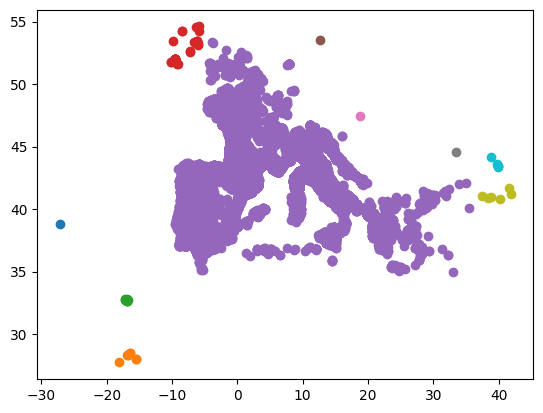

In [129]:
for i in range(len(postUnedoPops)):
    plt.plot(np.array(postUnedoPops[i])[:,0], np.array(postUnedoPops[i])[:,1], 'o')

In [97]:
import random

In [92]:
unedoPops = myClusteringFast(unedoPts)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [95]:
len(unedoPops)

1946

In [128]:
postUnedoPops = postProcessing(postUnedoPops, 2.2)

In [122]:
len(postUnedoPops)

26